## Import Libraries

In [56]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, precision_score, recall_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns



## Load Data

In [57]:
#load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv') 

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [58]:
# Display data information
print("Training Data:")
print("Shape:", train_data.shape)
print("\nHead:")
print(train_data.head())
print("\nClass Distribution:")
print(train_data['target'].value_counts())

print("\nTest Data:")
print("Shape:", test_data.shape)
print("\nHead:")
print(test_data.head())

Training Data:
Shape: (7613, 5)

Head:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Class Distribution:
0    4342
1    3271
Name: target, dtype: int64

Test Data:
Shape: (3263, 4)

Head:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN    

In [59]:
train_data = train_data.drop(['keyword','location'], axis = 1)
test_data = test_data.drop(['keyword' , 'location'], axis = 1)

# Display data information
print("Training Data:")
print("Shape:", train_data.shape)
print("\nHead:")
print(train_data.head())
print("\nClass Distribution:")
print(train_data['target'].value_counts())

print("\nTest Data:")
print("Shape:", test_data.shape)
print("\nHead:")
print(test_data.head())

Training Data:
Shape: (7613, 3)

Head:
   id                                               text  target
0   1  Our Deeds are the Reason of this #earthquake M...       1
1   4             Forest fire near La Ronge Sask. Canada       1
2   5  All residents asked to 'shelter in place' are ...       1
3   6  13,000 people receive #wildfires evacuation or...       1
4   7  Just got sent this photo from Ruby #Alaska as ...       1

Class Distribution:
0    4342
1    3271
Name: target, dtype: int64

Test Data:
Shape: (3263, 2)

Head:
   id                                               text
0   0                 Just happened a terrible car crash
1   2  Heard about #earthquake is different cities, s...
2   3  there is a forest fire at spot pond, geese are...
3   9           Apocalypse lighting. #Spokane #wildfires
4  11      Typhoon Soudelor kills 28 in China and Taiwan


In [60]:
#Clean Text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)   # Removes @mention
    text = re.sub(r'#', '',text)    # Removing the hashtags
    text= re.sub(r'RT[\s]:+', '', text)  # Removing retweets
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #Removing hyperlinks
    text = text.lower()
    return text
train_data['text']= train_data['text'].apply(cleanTxt)
test_data['text']= test_data['text'].apply(cleanTxt)

## Transform data

In [61]:
#Split Data
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'], train_data['target'], test_size=0.3, random_state=42)
X_test = test_data['text']

In [62]:
# Initialize count vectorizer
# count_vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)

# # Create count train and test variables
# count_train = count_vectorizer.fit_transform(X_train)
# count_test = count_vectorizer.transform(X_valid)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_valid)

In [63]:

tf_transformer = TfidfTransformer().fit(tfidf_train, y_train)
tfidf_train = tf_transformer.transform(tfidf_train)
tfidf_test1 =tfidf_vectorizer.transform(test_data['text'])


# Train model

In [64]:

# mnbc = MultinomialNB()
# mnbc.fit(count_train, y_train)
# countvect_pred = mnbc.predict(count_test)
# mnbc_score = accuracy_score(y_valid, countvect_pred)
# print("NaiveBayes CountVectorizer Accuracy:", mnbc_score)


mnbt = MultinomialNB()
mnbt.fit(tfidf_train, y_train)
tfidf_pred = mnbt.predict(tfidf_test)
tfidf_pred1 = mnbt.predict(tfidf_test1)
test_data['target'] = tfidf_pred1
mnbt_score = accuracy_score(y_valid, tfidf_pred)
print("NaiveBayes TF-IDF Accuracy:", mnbt_score)
print(test_data.head())


NaiveBayes TF-IDF Accuracy: 0.8012259194395797
   id                                               text  target
0   0                 just happened a terrible car crash       0
1   2  heard about earthquake is different cities, st...       1
2   3  there is a forest fire at spot pond, geese are...       1
3   9             apocalypse lighting. spokane wildfires       1
4  11      typhoon soudelor kills 28 in china and taiwan       1


In [65]:
# Calculate evaluation metrics using the actual target values from the validation dataset
accuracy = accuracy_score(y_valid, tfidf_pred)
f1 = f1_score(y_valid, tfidf_pred)
precision = precision_score(y_valid, tfidf_pred)
recall = recall_score(y_valid, tfidf_pred)
report = classification_report(y_valid, tfidf_pred)

# Print the evaluation metrics
print("Logistic Regression model Accuracy:", accuracy)
print("Logistic Regression model F1 Score:", f1)
print("Logistic Regression model Precision:", precision)
print("Logistic Regression model Recall:", recall)
print(report)

Logistic Regression model Accuracy: 0.8012259194395797
Logistic Regression model F1 Score: 0.7440811724915444
Logistic Regression model Precision: 0.8168316831683168
Logistic Regression model Recall: 0.6832298136645962
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1318
           1       0.82      0.68      0.74       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



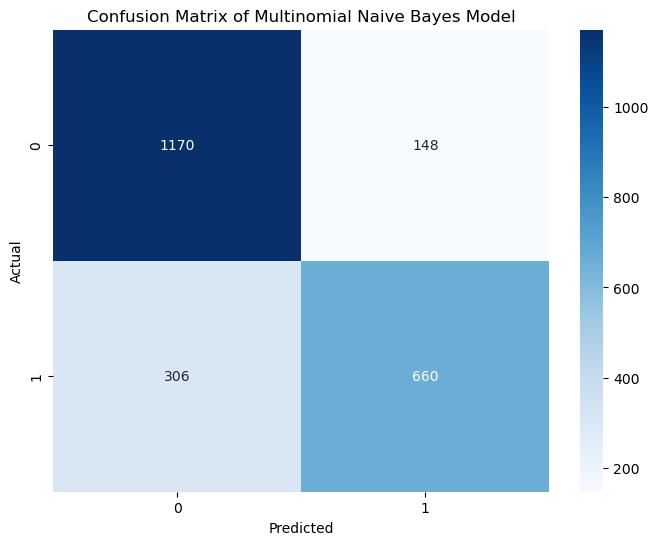

In [66]:
# Visualize the Confusion Matrix for Multinomial Naive Bayes model
cm = confusion_matrix(y_valid, tfidf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(tfidf_train, y_train)
lin_svc_pred = lin_svc.predict(tfidf_test)
lin_svc_pred1 = lin_svc.predict(tfidf_test1)
test_data['target'] = lin_svc_pred1
lin_score = accuracy_score(y_valid, lin_svc_pred)
print("Linear SVC TF-IDF Accuracy:", lin_score)
print(test_data.head())


Linear SVC TF-IDF Accuracy: 0.7806479859894921
   id                                               text  target
0   0                 just happened a terrible car crash       0
1   2  heard about earthquake is different cities, st...       1
2   3  there is a forest fire at spot pond, geese are...       1
3   9             apocalypse lighting. spokane wildfires       1
4  11      typhoon soudelor kills 28 in china and taiwan       1


In [68]:
# Calculate evaluation metrics using the actual target values from the validation dataset
accuracy = accuracy_score(y_valid, lin_svc_pred)
f1 = f1_score(y_valid, lin_svc_pred)
precision = precision_score(y_valid, lin_svc_pred)
recall = recall_score(y_valid, lin_svc_pred)
report = classification_report(y_valid, lin_svc_pred)

# Print the evaluation metrics
print("Logistic Regression model Accuracy:", accuracy)
print("Logistic Regression model F1 Score:", f1)
print("Logistic Regression model Precision:", precision)
print("Logistic Regression model Recall:", recall)
print(report)

Logistic Regression model Accuracy: 0.7806479859894921
Logistic Regression model F1 Score: 0.7364544976328249
Logistic Regression model Precision: 0.7486631016042781
Logistic Regression model Recall: 0.7246376811594203
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1318
           1       0.75      0.72      0.74       966

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284



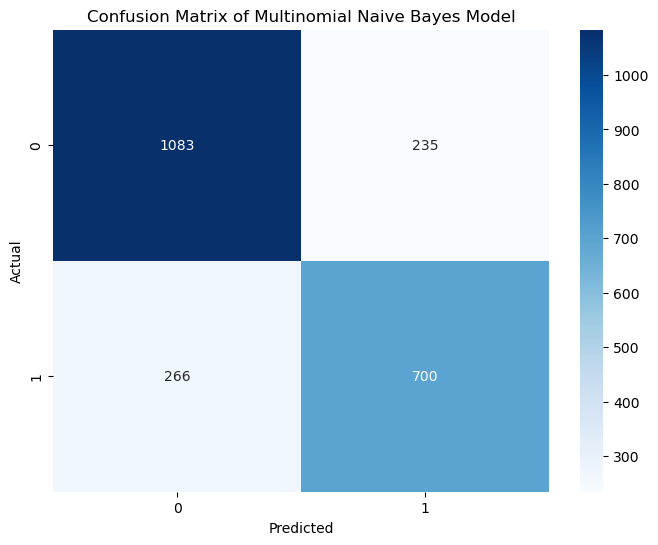

In [69]:
# Visualize the Confusion Matrix for Multinomial Naive Bayes model
cm = confusion_matrix(y_valid, lin_svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(tfidf_train, y_train)
svc_pred = svc.predict(tfidf_test)
svc_pred1 = svc.predict(tfidf_test1)
test_data['target'] = svc_pred1
lin_score = accuracy_score(y_valid, svc_pred)
print("SVC TF-IDF Accuracy:", lin_score)
print(test_data.head())

SVC TF-IDF Accuracy: 0.8016637478108581
   id                                               text  target
0   0                 just happened a terrible car crash       0
1   2  heard about earthquake is different cities, st...       1
2   3  there is a forest fire at spot pond, geese are...       1
3   9             apocalypse lighting. spokane wildfires       0
4  11      typhoon soudelor kills 28 in china and taiwan       1


In [71]:
# Calculate evaluation metrics using the actual target values from the validation dataset
accuracy = accuracy_score(y_valid, svc_pred)
f1 = f1_score(y_valid, svc_pred)
precision = precision_score(y_valid, svc_pred)
recall = recall_score(y_valid, svc_pred)
report = classification_report(y_valid, svc_pred)

# Print the evaluation metrics
print("Logistic Regression model Accuracy:", accuracy)
print("Logistic Regression model F1 Score:", f1)
print("Logistic Regression model Precision:", precision)
print("Logistic Regression model Recall:", recall)
print(report)

Logistic Regression model Accuracy: 0.8016637478108581
Logistic Regression model F1 Score: 0.7367809413131902
Logistic Regression model Precision: 0.8397350993377484
Logistic Regression model Recall: 0.6563146997929606
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1318
           1       0.84      0.66      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



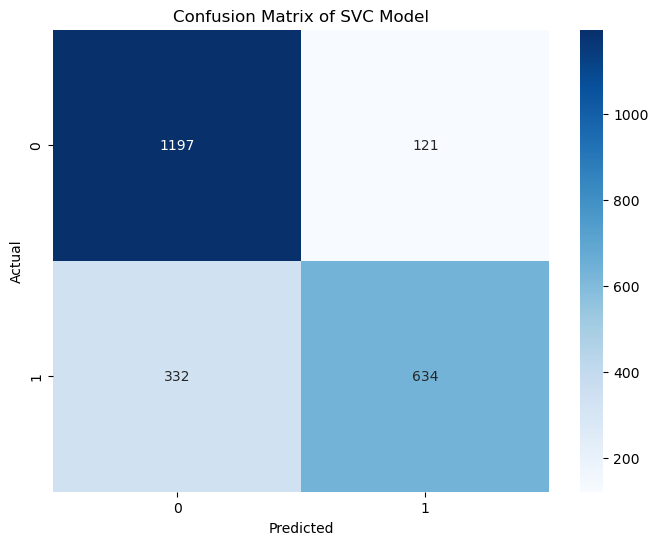

In [72]:
# Visualize the Confusion Matrix for Multinomial Naive Bayes model
cm = confusion_matrix(y_valid, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of SVC Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
#Convert to CSV
test_data = test_data.drop('text', axis = 1)
test_data = test_data.set_index('id')
test_data.to_csv('Disaster.csv')
print(test_data)

       target
id           
0           0
2           1
3           1
9           0
11          1
...       ...
10861       1
10865       1
10868       1
10874       1
10875       1

[3263 rows x 1 columns]
